# Wind Generation Data EDA and Forecasting

Notebook below explores the dataset containing wind generation in four of the German Transmission System Operators (TSOs)


![German TSOs](https://www.cleanenergywire.org/sites/default/files/resize/styles/large/public/images/factsheet/130514-regelzonen-nep-800x535.jpg?itok=RE8S7NLK)

*image credit:https://www.cleanenergywire.org

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/Python/Wind/analyzing_wind_power_generation_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wind-power-generation/TenneTTSO.csv
/kaggle/input/wind-power-generation/50Hertz.csv
/kaggle/input/wind-power-generation/TransnetBW.csv
/kaggle/input/wind-power-generation/Amprion.csv


In [6]:
names = ['TenneTTSO','50Hertz','TransnetBW','Amprion']
infileloc = 'D:/Python/Wind/analyzing_wind_power_generation_data/'
wind_data_df = []

for filename in names:
    infile = infileloc + filename + '.csv'
    DF = pd.read_csv(infile, infer_datetime_format=True)
#     print(infile)
    wind_data_df.append(DF)

wind_data_df[0]

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,9.68,10.16,10.94,11.39,12.09,12.79,13.33,13.88,14.73,...,73.52,74.03,74.77,73.32,74.83,73.10,71.26,71.95,69.97,69.58
1,24/08/2019,67.94,67.52,64.48,64.78,65.75,65.07,63.39,63.69,64.37,...,116.79,114.30,110.81,109.76,106.55,102.31,99.04,96.57,94.75,91.73
2,25/08/2019,89.38,88.95,85.13,82.74,81.46,77.92,75.58,72.94,70.41,...,50.02,48.04,45.45,43.04,41.25,39.36,37.60,35.46,34.00,33.47
3,26/08/2019,33.71,31.84,32.75,33.33,32.02,30.97,29.97,28.47,25.92,...,71.72,69.34,67.46,65.91,64.29,62.16,57.53,58.15,55.76,54.34
4,27/08/2019,52.65,47.95,44.61,43.80,41.00,41.23,41.07,39.49,36.93,...,54.66,54.82,55.75,54.94,56.00,56.02,55.51,55.96,56.48,55.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,18/09/2020,124.69,121.15,116.35,117.81,113.87,112.95,111.01,107.75,106.91,...,134.95,135.84,135.68,135.15,136.08,134.93,136.34,136.11,136.49,137.24
393,19/09/2020,136.90,134.27,127.98,121.21,116.74,112.38,109.31,105.27,103.17,...,112.13,108.24,101.49,96.71,95.76,95.43,93.18,88.94,85.83,85.35
394,20/09/2020,82.05,79.81,80.18,80.94,79.70,77.91,76.14,75.67,75.62,...,87.46,81.43,77.20,72.57,69.18,67.02,63.75,62.38,62.14,59.84
395,21/09/2020,55.75,53.17,51.77,50.08,48.95,47.45,46.61,44.66,42.67,...,16.04,14.84,14.13,13.38,13.19,13.29,12.88,12.09,11.60,11.61


In [7]:
#Create a function to go through each df in wind data and return a time series dataframe in long format since they are currently in wide format

def return_ts_df(df, TSOname):
    varname = TSOname
    df = pd.melt(df, id_vars = 'Date', var_name = 'Time', value_name = varname)
    df['Dates'] = df['Date'].astype(str) +' '+df['Time'].astype(str)
    df['Dates'] = pd.to_datetime(df['Dates'], format = '%d/%m/%Y %H:%M:%S')
    df.drop(columns=['Date','Time'], inplace=True)
    cols = ['Dates',varname]
    df = df[cols]
    df = df.set_index('Dates')
    df = df.sort_index()
    df.reset_index(drop=False, inplace=True)
    return df

ten_df = return_ts_df(wind_data_df[0],'TennetTSO')
fiftyHz_df = return_ts_df(wind_data_df[1],'50Hertz')
transnet_df = return_ts_df(wind_data_df[2],'TransnetBW')
amprion_df = return_ts_df(wind_data_df[3],'Amprion')


In [8]:
ten_df[:10]

,Dates,TennetTSO
0,2019-08-23 00:00:00,9.68
1,2019-08-23 00:15:00,10.16
2,2019-08-23 00:30:00,10.94
3,2019-08-23 00:45:00,11.39
4,2019-08-23 01:00:00,12.09
5,2019-08-23 01:15:00,12.79
6,2019-08-23 01:30:00,13.33
7,2019-08-23 01:45:00,13.88
8,2019-08-23 02:00:00,14.73
9,2019-08-23 02:15:00,14.95


In [9]:
# print(ten_df.info())

#Get some statistics

print(ten_df.describe())
print(fiftyHz_df.describe())
print(transnet_df.describe())
print(amprion_df.describe())

          TennetTSO
count  38112.000000
mean     146.705854
std      144.065379
min        0.000000
25%       42.287500
50%       93.330000
75%      206.842500
max      727.440000
            50Hertz
count  38112.000000
mean     143.607788
std      138.068975
min        0.000000
25%       43.000000
50%       96.000000
75%      199.000000
max      725.000000
         TransnetBW
count  38112.000000
mean      30.145426
std       35.860767
min        0.000000
25%        5.430000
50%       16.440000
75%       43.815000
max     1506.780000
            Amprion
count  38112.000000
mean      97.769574
std       97.199843
min        0.000000
25%       23.000000
50%       62.000000
75%      144.000000
max      463.000000


In [10]:
from functools import reduce

#combine dataframes

dataframes = [ten_df,fiftyHz_df,transnet_df,amprion_df]
wind_data_all = reduce(lambda x,y: pd.merge(x,y, on='Dates', how='outer'),dataframes)
    
wind_data_all

,Dates,TennetTSO,50Hertz,TransnetBW,Amprion
0,2019-08-23 00:00:00,9.68,74,1.44,5
1,2019-08-23 00:15:00,10.16,73,1.38,5
2,2019-08-23 00:30:00,10.94,63,1.38,6
3,2019-08-23 00:45:00,11.39,55,1.50,7
4,2019-08-23 01:00:00,12.09,54,1.77,6
...,...,...,...,...,...
38107,2020-09-22 22:45:00,11.76,75,9.78,12
38108,2020-09-22 23:00:00,13.18,72,10.00,12
38109,2020-09-22 23:15:00,14.32,71,11.78,13
38110,2020-09-22 23:30:00,15.54,69,12.75,13


In [11]:
wind_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38112 entries, 0 to 38111
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       38112 non-null  datetime64[ns]
 1   TennetTSO   38112 non-null  float64       
 2   50Hertz     38112 non-null  int64         
 3   TransnetBW  38112 non-null  float64       
 4   Amprion     38112 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.7 MB


# Resample to Monthly wind data

In [12]:
#Monthly wind data
wind_data_all_M = wind_data_all.resample('M', on='Dates').mean()
wind_data_all_M


,TennetTSO,50Hertz,TransnetBW,Amprion
Dates,,,,
2019-08-31,39.579491,47.189815,5.991597,24.111111
2019-09-30,123.848076,123.309722,26.265677,79.705208
2019-10-31,156.926401,141.315188,37.642053,125.918347
2019-11-30,132.471434,130.964931,31.732840,92.237153
2019-12-31,202.267997,192.162634,52.914204,143.209677
2020-01-31,227.523673,228.858871,42.730017,153.387769
2020-02-29,369.215815,337.136135,68.100521,235.062141
2020-03-31,204.421794,184.721774,46.309284,135.522513
2020-04-30,119.507469,121.488542,22.128003,67.316667


<Figure size 1080x864 with 0 Axes>

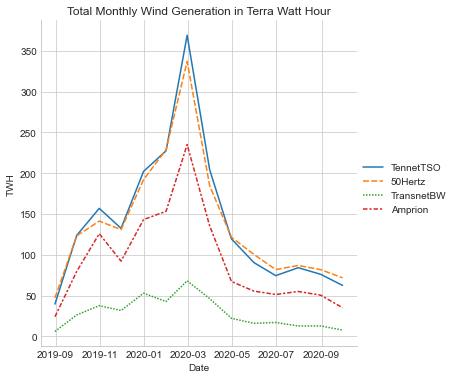

In [13]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,12))
sns.relplot(data=wind_data_all_M, kind = "line")

plt.title("Total Monthly Wind Generation in Terra Watt Hour")
plt.xlabel("Date")
plt.ylabel("TWH")
plt.show()

# Daily data



In [14]:
#Daily wind data
wind_data_all_D = wind_data_all.resample('D', on='Dates').mean()
wind_data_all_D

,TennetTSO,50Hertz,TransnetBW,Amprion
Dates,,,,
2019-08-23,27.664167,30.718750,13.457708,23.562500
2019-08-24,68.409688,61.916667,6.879896,32.885417
2019-08-25,36.475312,76.656250,0.798229,14.854167
2019-08-26,35.445521,40.416667,1.813750,12.447917
2019-08-27,34.862083,46.458333,2.910312,15.520833
...,...,...,...,...
2020-09-18,101.122604,48.114583,31.756563,97.312500
2020-09-19,88.397292,78.343750,10.759062,60.208333
2020-09-20,58.745833,70.364583,5.176354,37.562500


In [15]:
wind_data_all_D.reset_index(inplace=True)
wind_data_all_D['month'] = wind_data_all_D['Dates'].dt.month
wind_data_all_D['dayofweek_name'] = wind_data_all_D['Dates'].dt.day_name()

#Officially spring is during the months of March, April and May in Germany. Summer is from June through to August. Autumn is during the months of September, October and November and winter is from December to February.

seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Autumn','Autumn','Autumn','Winter']
month_to_season = dict(zip(range(1,13), seasons))

wind_data_all_D['Season'] = wind_data_all_D['Dates'].dt.month.map(month_to_season)
wind_data_all_D

,Dates,TennetTSO,50Hertz,TransnetBW,Amprion,month,dayofweek_name,Season
0,2019-08-23,27.664167,30.718750,13.457708,23.562500,8,Friday,Summer
1,2019-08-24,68.409688,61.916667,6.879896,32.885417,8,Saturday,Summer
2,2019-08-25,36.475312,76.656250,0.798229,14.854167,8,Sunday,Summer
3,2019-08-26,35.445521,40.416667,1.813750,12.447917,8,Monday,Summer
4,2019-08-27,34.862083,46.458333,2.910312,15.520833,8,Tuesday,Summer
...,...,...,...,...,...,...,...,...
392,2020-09-18,101.122604,48.114583,31.756563,97.312500,9,Friday,Autumn
393,2020-09-19,88.397292,78.343750,10.759062,60.208333,9,Saturday,Autumn
394,2020-09-20,58.745833,70.364583,5.176354,37.562500,9,Sunday,Autumn
395,2020-09-21,17.164062,36.177083,2.392708,12.802083,9,Monday,Autumn


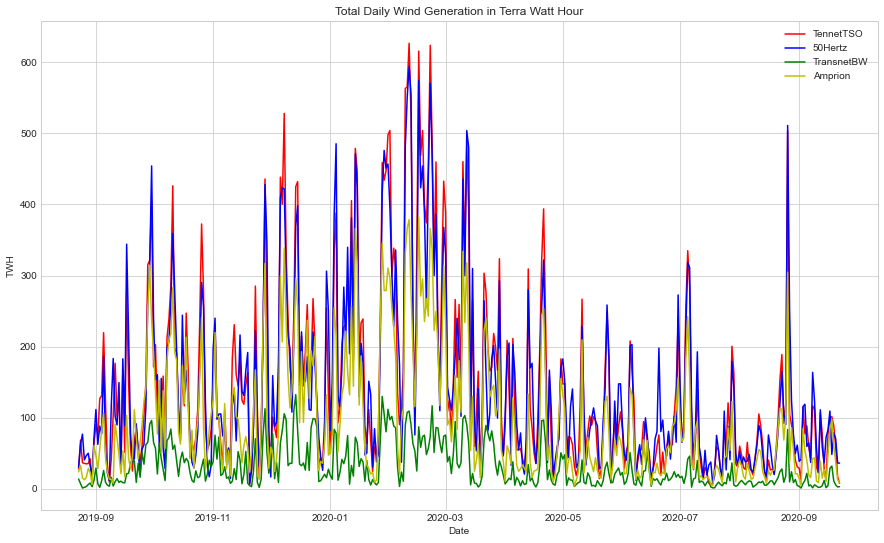

In [16]:
fig, ax = plt.subplots(figsize=(15,9))

sns.lineplot(x="Dates", 
             y="TennetTSO",
             data = wind_data_all_D,
             color='r',
#              hue = 'dayofweek_name', 
             dashes=False,
             ax=ax)
sns.lineplot(x="Dates", 
             y="50Hertz", 
             data = wind_data_all_D,
             color='b',
#              hue = 'dayofweek_name',
             dashes=False,
             ax=ax)   
sns.lineplot(x="Dates", 
             y="TransnetBW", 
             data = wind_data_all_D,
             color='g',
#              hue = 'dayofweek_name', 
             dashes=False,
             ax=ax) 
sns.lineplot(x="Dates", 
             y="Amprion", 
             data = wind_data_all_D,
             color='y',
#              hue = 'dayofweek_name',
             dashes=False,
             ax=ax) 
ax.legend(['TennetTSO', '50Hertz','TransnetBW','Amprion'], facecolor='w')
plt.title("Total Daily Wind Generation in Terra Watt Hour")
plt.xlabel("Date")
plt.ylabel("TWH")
plt.show()

In [17]:
wind_data_all_D

,Dates,TennetTSO,50Hertz,TransnetBW,Amprion,month,dayofweek_name,Season
0,2019-08-23,27.664167,30.718750,13.457708,23.562500,8,Friday,Summer
1,2019-08-24,68.409688,61.916667,6.879896,32.885417,8,Saturday,Summer
2,2019-08-25,36.475312,76.656250,0.798229,14.854167,8,Sunday,Summer
3,2019-08-26,35.445521,40.416667,1.813750,12.447917,8,Monday,Summer
4,2019-08-27,34.862083,46.458333,2.910312,15.520833,8,Tuesday,Summer
...,...,...,...,...,...,...,...,...
392,2020-09-18,101.122604,48.114583,31.756563,97.312500,9,Friday,Autumn
393,2020-09-19,88.397292,78.343750,10.759062,60.208333,9,Saturday,Autumn
394,2020-09-20,58.745833,70.364583,5.176354,37.562500,9,Sunday,Autumn
395,2020-09-21,17.164062,36.177083,2.392708,12.802083,9,Monday,Autumn


In [18]:
wind_data_all_D.set_index('Dates',inplace=True)
wind_data_all_D.drop(['month'],axis=1, inplace=True)

### Let's look at the wind generation profile for one of the seasons

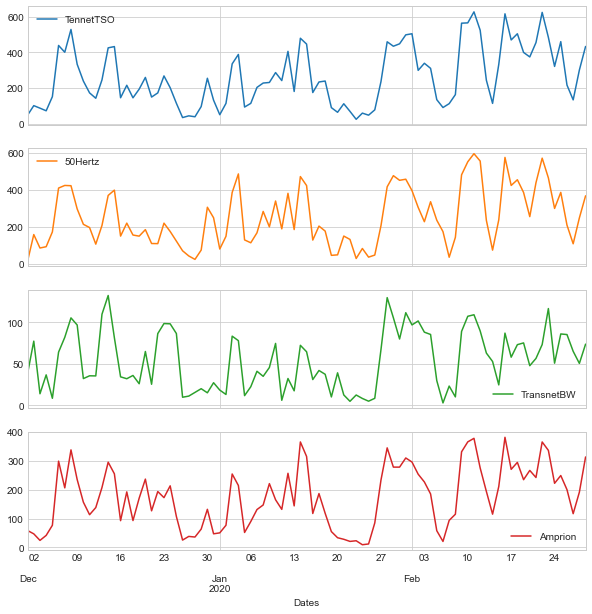

In [19]:
#Let's look at one of the seasons
wind_data_all_D[wind_data_all_D['Season']=='Winter'].plot(subplots=True, sharex=True, figsize=(10,10))
# wind_data_all_D[wind_data_all_D['Season']=='Spring'].plot(subplots=True, sharex=True, figsize=(10,10))

plt.show()

**Interesting tidbit from a google search:**

> California is approximately 403,882 sq km, while Germany is approximately 357,022 sq km, making Germany 88.4% the size of California. Meanwhile, the population of California is ~37.3 million people (42.9 million more people live in Germany).

This may be the reason why the wind generation in all four of them appear to have similar profiles.


# Hourly data

In [20]:
#Hourly wind data
wind_data_all_H = wind_data_all.resample('H', on='Dates').mean()
wind_data_all_H.reset_index(inplace=True)
wind_data_all_H

#save this dataframe for modeling later
ts = wind_data_all_H.copy(deep=True)

In [21]:
wind_data_all_H['month'] = wind_data_all_H['Dates'].dt.month
wind_data_all_H['dayofweek_name'] = wind_data_all_H['Dates'].dt.day_name()
wind_data_all_H.head()

,Dates,TennetTSO,50Hertz,TransnetBW,Amprion,month,dayofweek_name
0,2019-08-23 00:00:00,10.5425,66.25,1.4250,5.75,8,Friday
1,2019-08-23 01:00:00,13.0225,52.50,2.0150,5.25,8,Friday
2,2019-08-23 02:00:00,15.2450,39.25,3.3200,4.50,8,Friday
3,2019-08-23 03:00:00,18.1275,30.50,6.4900,4.25,8,Friday
4,2019-08-23 04:00:00,21.0925,28.25,11.1825,6.00,8,Friday


In [22]:
#using seasons and month to season mapping from earlier

wind_data_all_H['Season'] = wind_data_all_H['Dates'].dt.month.map(month_to_season)

In [23]:
wind_data_all_H[500:505]

,Dates,TennetTSO,50Hertz,TransnetBW,Amprion,month,dayofweek_name,Season
500,2019-09-12 20:00:00,119.8925,96.25,9.4075,78.00,9,Thursday,Autumn
501,2019-09-12 21:00:00,125.6925,106.00,10.5325,80.25,9,Thursday,Autumn
502,2019-09-12 22:00:00,133.8375,99.50,10.5850,82.75,9,Thursday,Autumn
503,2019-09-12 23:00:00,146.8375,113.25,9.1650,103.50,9,Thursday,Autumn
504,2019-09-13 00:00:00,164.1150,127.50,7.4800,102.50,9,Friday,Autumn


In [24]:
#Recover default matplotlib settings 
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Use white grid plot background from seaborn
sns.set(context='notebook',style='whitegrid', font_scale=1.5)

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

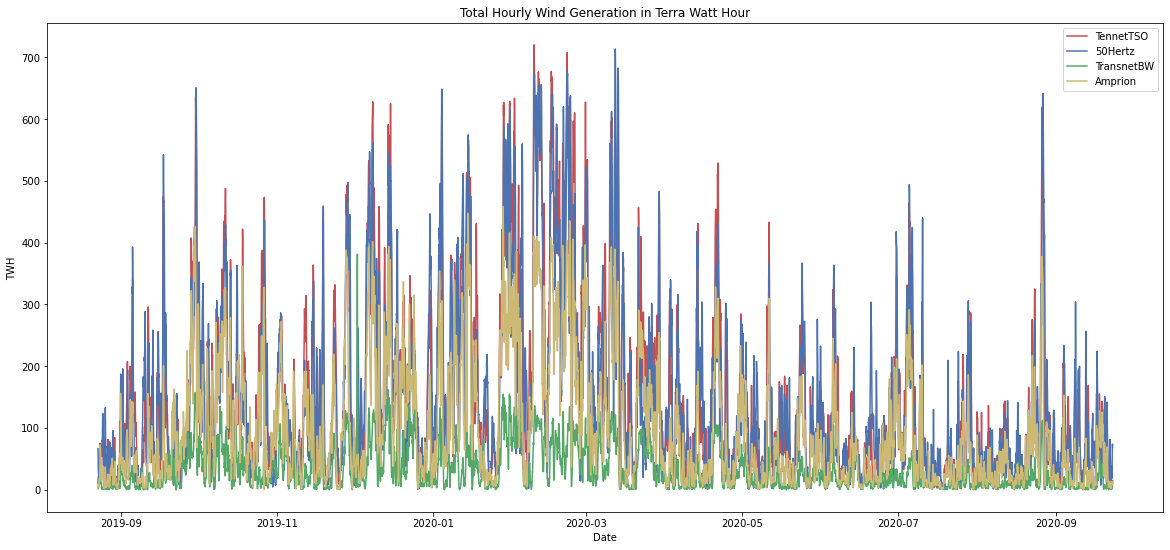

In [25]:
# wind_data_all_H.plot()

fig, ax = plt.subplots(figsize=(20,9))

sns.lineplot(x="Dates", 
             y="TennetTSO",
             data = wind_data_all_H,
             color='r',
#              hue = 'dayofweek_name', 
             dashes=False,
             ax=ax)
sns.lineplot(x="Dates", 
             y="50Hertz", 
             data = wind_data_all_H,
             color='b',
#              hue = 'dayofweek_name',
             dashes=False,
             ax=ax)   
sns.lineplot(x="Dates", 
             y="TransnetBW", 
             data = wind_data_all_H,
             color='g',
#              hue = 'dayofweek_name', 
             dashes=False,
             ax=ax) 
sns.lineplot(x="Dates", 
             y="Amprion", 
             data = wind_data_all_H,
             color='y',
#              hue = 'dayofweek_name',
             dashes=False,
             ax=ax) 
ax.legend(['TennetTSO', '50Hertz','TransnetBW','Amprion'], facecolor='w')
plt.title("Total Hourly Wind Generation in Terra Watt Hour")
plt.xlabel("Date")
plt.ylabel("TWH")
plt.show()

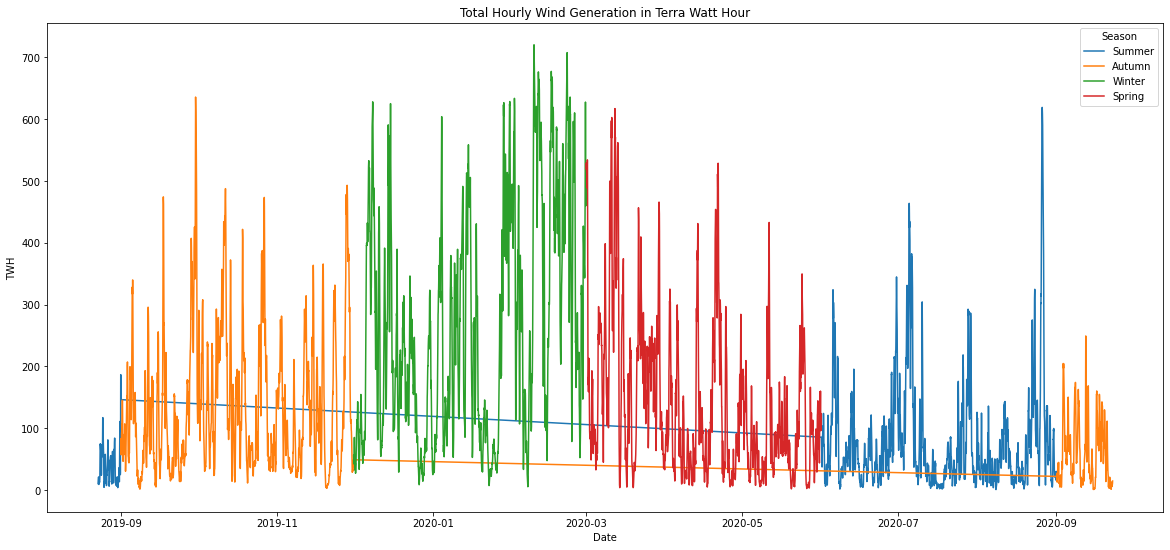

In [26]:
fig, ax = plt.subplots(figsize=(20,9))

sns.lineplot(x="Dates", 
             y="TennetTSO",
             data = wind_data_all_H,
#              color='r',
             hue = 'Season', 
#              style='Season',
             dashes=False,
             ax=ax)

plt.title("Total Hourly Wind Generation in Terra Watt Hour")
plt.xlabel("Date")
plt.ylabel("TWH")
plt.show()

### Smoothing

In [27]:
!pip install tsmoothie

In [28]:
from tsmoothie.smoother import *
from tsmoothie.utils_func import create_windows



In [29]:
## Use Kalman filter to smooth data for visualization 

smoother = KalmanSmoother(component = 'level_longseason',
                         component_noise ={'level':0.5,
                                          'longseason':0.1},
                         n_longseasons=365)

smoother.smooth(wind_data_all_H[['TennetTSO', '50Hertz','TransnetBW','Amprion']].T)


<tsmoothie.smoother.KalmanSmoother>

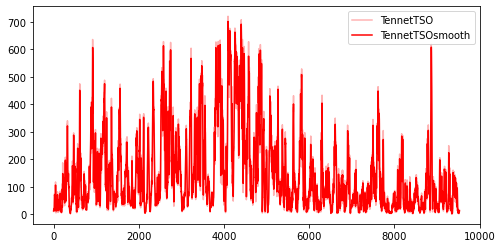

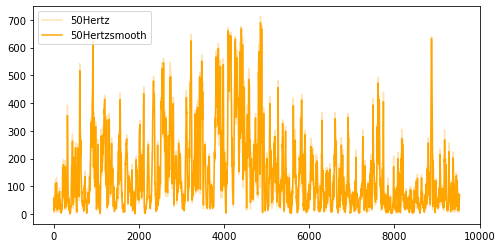

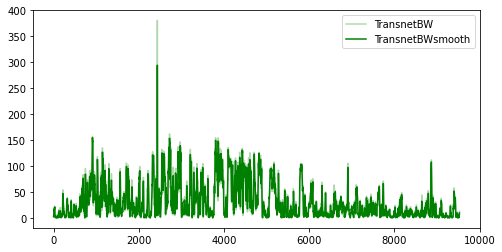

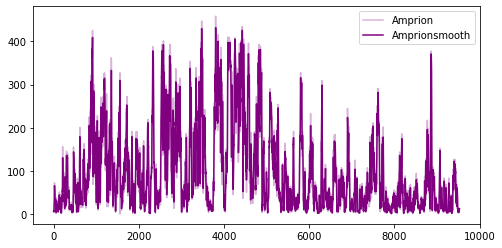

In [30]:
color = {0:'red', 1:'orange', 2:'green', 3:'purple'}

cols = ['TennetTSO', '50Hertz','TransnetBW','Amprion']

for i, name in enumerate(wind_data_all_H[cols]):
    plt.figure(figsize=(8,4))
    plt.plot(wind_data_all_H.index, smoother.data[i], c=color[i], label=name, alpha=0.3)
    plt.plot(wind_data_all_H.index, smoother.smooth_data[i], c=color[i], label=name+'smooth')
    plt.legend()
    plt.show



In [31]:

wind_data_all_H = wind_data_all_H.set_index('Dates')
wind_data_all_H


,TennetTSO,50Hertz,TransnetBW,Amprion,month,dayofweek_name,Season
Dates,,,,,,,
2019-08-23 00:00:00,10.5425,66.25,1.4250,5.75,8,Friday,Summer
2019-08-23 01:00:00,13.0225,52.50,2.0150,5.25,8,Friday,Summer
2019-08-23 02:00:00,15.2450,39.25,3.3200,4.50,8,Friday,Summer
2019-08-23 03:00:00,18.1275,30.50,6.4900,4.25,8,Friday,Summer
2019-08-23 04:00:00,21.0925,28.25,11.1825,6.00,8,Friday,Summer
...,...,...,...,...,...,...,...
2020-09-22 19:00:00,6.9200,61.50,3.4775,9.50,9,Tuesday,Autumn
2020-09-22 20:00:00,7.8575,68.25,4.0775,10.25,9,Tuesday,Autumn
2020-09-22 21:00:00,9.4775,73.00,5.2850,12.00,9,Tuesday,Autumn


<Figure size 1080x504 with 0 Axes>

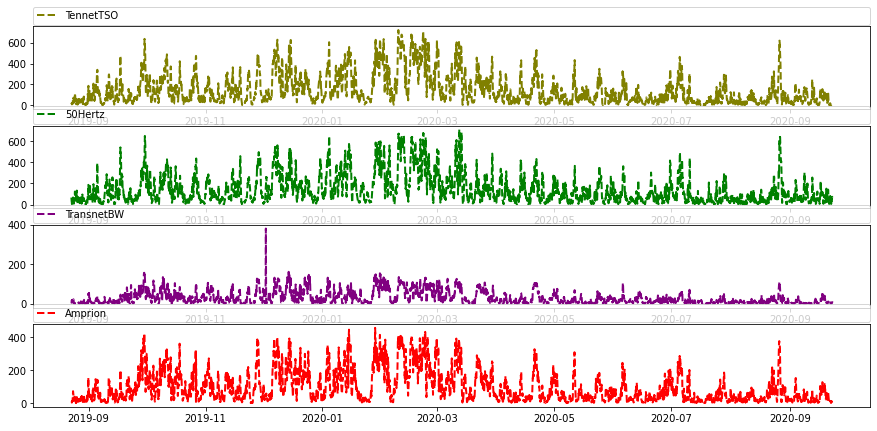

In [32]:
plt.figure(figsize=(15,7))
# wind_data_all_H.TennetTSO.plot()
df = wind_data_all_H.reset_index()
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,7))

ax1.plot( 'Dates', 'TennetTSO', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="TennetTSO")
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)

ax2.plot( 'Dates', '50Hertz', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="50Hertz")
ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)

ax3.plot( 'Dates', 'TransnetBW', data=df, marker='', color='purple', linewidth=2, linestyle='dashed', label="TransnetBW")
ax3.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)

ax4.plot( 'Dates', 'Amprion', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="Amprion")
ax4.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)

plt.show()

# Look for any correlation

In [33]:
# wind_data_all_H.set_index('Dates',inplace=True)

data_v1 = wind_data_all_H[['TennetTSO', '50Hertz','TransnetBW','Amprion']]
data_v1

,TennetTSO,50Hertz,TransnetBW,Amprion
Dates,,,,
2019-08-23 00:00:00,10.5425,66.25,1.4250,5.75
2019-08-23 01:00:00,13.0225,52.50,2.0150,5.25
2019-08-23 02:00:00,15.2450,39.25,3.3200,4.50
2019-08-23 03:00:00,18.1275,30.50,6.4900,4.25
2019-08-23 04:00:00,21.0925,28.25,11.1825,6.00
...,...,...,...,...
2020-09-22 19:00:00,6.9200,61.50,3.4775,9.50
2020-09-22 20:00:00,7.8575,68.25,4.0775,10.25
2020-09-22 21:00:00,9.4775,73.00,5.2850,12.00


<AxesSubplot:>

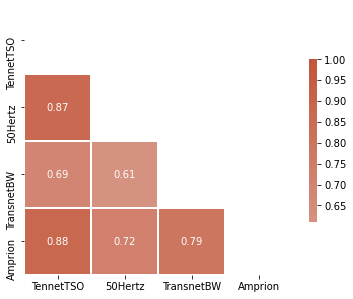

In [34]:
# compute the correlation matrix

df_corr = data_v1.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1.0, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

They seem to be all correlated with each other.



# Time Series Modeling

In [43]:
#import required python packages

import datetime
import lightgbm as lgb
import xgboost as xgb
import plotly.express as px

from typing import Optional, List, Dict
from fbprophet import Prophet
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'fbprophet'

Let's work on the first time series of TenneT TSO

In [ ]:
ts1 = ten_df.resample('H', on = 'Dates').mean().reset_index()
ts1 = ts1.rename(columns={'TennetTSO':'TWH_Generation'})
ts1

### Generating date related features

In [33]:
    #Officially spring is during the months of March, April and May in Germany. Summer is from June through to August. Autumn is during the months of September, October and November and winter is from December to February.

    seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Autumn','Autumn','Autumn','Winter']
    season_num = [4,4,1,1,1,2,2,2,3,3,3,4]
    month_to_season_num = dict(zip(range(1,13), season_num))

In [34]:
month_to_season_num

{1: 4, 2: 4, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 4}

In [35]:
def return_date_features(df, datetime_col):
    """
    Create date related features for the datetime column that is passed 
    returns Input dataframe with additional time related feature columns
    """
    df['date_hour'] = df[datetime_col].dt.floor('H')
    df['date'] = df[datetime_col].dt.floor('D')
    df['hour_of_day'] = df[datetime_col].dt.hour
    df['day_of_week'] = df[datetime_col].dt.dayofweek
    df['month_of_year'] = df[datetime_col].dt.month
    df['day_of_year'] = df[datetime_col].dt.dayofyear
    df['week_of_year'] = df[datetime_col].dt.isocalendar().week
    
    df['Season'] = df[datetime_col].dt.month.map(month_to_season_num)
    
    return df
    

In [36]:
ts1 = return_date_features(ts1, 'Dates')
ts1.head()

,Dates,TWH_Generation,date_hour,date,hour_of_day,day_of_week,month_of_year,day_of_year,week_of_year,Season
0,2019-08-23 00:00:00,10.5425,2019-08-23 00:00:00,2019-08-23,0,4,8,235,34,2
1,2019-08-23 01:00:00,13.0225,2019-08-23 01:00:00,2019-08-23,1,4,8,235,34,2
2,2019-08-23 02:00:00,15.2450,2019-08-23 02:00:00,2019-08-23,2,4,8,235,34,2
3,2019-08-23 03:00:00,18.1275,2019-08-23 03:00:00,2019-08-23,3,4,8,235,34,2
4,2019-08-23 04:00:00,21.0925,2019-08-23 04:00:00,2019-08-23,4,4,8,235,34,2


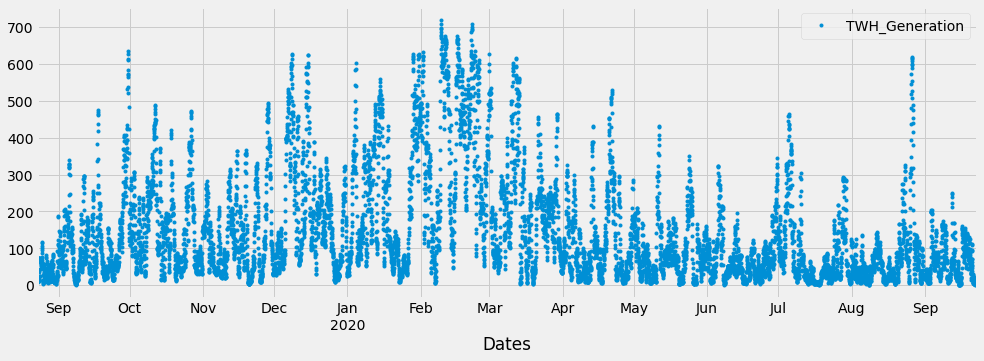

In [37]:
#plot the time series
fig = ts1.plot(x="Dates", y="TWH_Generation", style='.', figsize=(15,5))

In [38]:
#plotting additional aggregates for the features that were created

def lineplot_agg_grouped(df, group_col, target_col, y_label, agg_type = 'mean', x_ticks = 0):
    """
    plots the aggregate value of a column in a dataframe grouped by another column
    """
    agg_df = df.groupby([group_col]).agg({target_col:agg_type}).reset_index()
    plt.figure(figsize=(6,4))
    ax = sns.lineplot(data=agg_df, x=agg_df[group_col], y=target_col, marker='o')
    ax.set(ylabel=y_label)
    plt.xticks(rotation=x_ticks)
    
    return

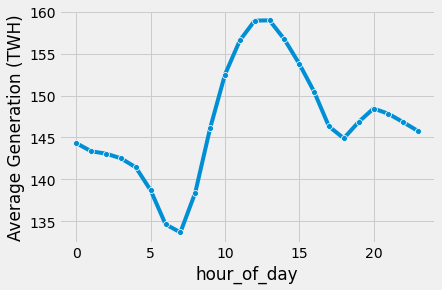

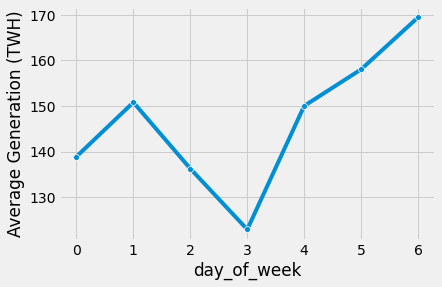

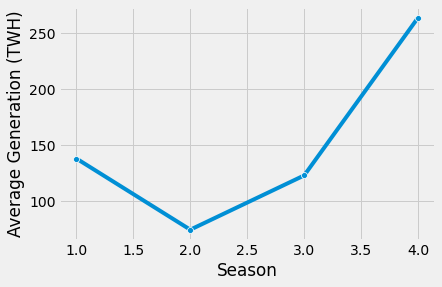

In [39]:
# plot average observations grouped by different features

ts_features = ['hour_of_day','day_of_week','Season']

for ts_feature in ts_features:
    lineplot_agg_grouped(
        df = ts1,
        group_col = ts_feature,
        target_col = 'TWH_Generation',
        y_label = 'Average Generation (TWH)',
        agg_type = 'mean',
        x_ticks=0)
    

#### Observations:
Average generation seems be higher during the day with sunrise hours having the lower portion of generation.

Weekend generation is generally higher compared to weekdays. One guess is that this may be due to less curtailment on the weekends.

Generation in Summer (2) is least compared to all the other seasons. Autumn (3) is next followed by Spring (1) and the highest average generation is during the Winter (4) months.





In [40]:
#splitting the train and test data

split_date = '2020-07-22'
ts1['type'] = 'train'
ts1.loc[ts1['date']>= split_date, 'type'] = 'test'
train = ts1.loc[ts1['type'] == 'train'].reset_index(drop=True)
test = ts1.loc[ts1['type'] == 'test'].reset_index(drop=True)


In [41]:
#plotting time series grouped by train and test datasets
fig = px.scatter(ts1, x="Dates", y="TWH_Generation", hover_data=['day_of_week'], color='type')
fig.update_traces(mode='markers+lines', marker_size=3)
fig.show()

### Create an evaluation metric 

In [42]:
def eval_accuracy(y_true, y_pred):
    """
    y_true - actual values as pandas series
    y_pred - predicted values as pandas series
    return: dictionary with MAE, RMSE and MAPE metrics
    """
    #mean absolute error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    #root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    #mean absolute percentage error (MAPE)
    mape = np.mean(np.abs((y_true-y_pred) / y_true)) * 100
    
    return {'MAE': round(mae, 3),
           'RMSE': round(rmse, 3),
           'MAPE': round(mape, 3)}

    

## TS Forecasting with FB Prophet

Create a time series model with Facebook's Prophet package using the hourly generation data for Tennet TSO

In [43]:
#prophet with default parameters
# https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
#seasonality_prior_scale=1
model_prophet = Prophet(changepoint_prior_scale= 0.5,seasonality_prior_scale=0.01)
model_prophet.fit(train.rename(columns={'Dates':'ds', 'TWH_Generation':'y'}))
test_prophet = model_prophet.predict(df = test.rename(columns={'Dates':'ds', 'TWH_Generation':'y'}))

In [44]:
#check the predictions

test_prophet.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-22 00:00:00,72.352355,-74.949935,212.400894,72.352355,72.352355,-2.817005,-2.817005,-2.817005,-2.462970,-2.462970,-2.462970,-0.354035,-0.354035,-0.354035,0.0,0.0,0.0,69.535350
1,2020-07-22 01:00:00,72.341026,-90.792926,221.973869,72.341026,72.341026,-4.836821,-4.836821,-4.836821,-2.956064,-2.956064,-2.956064,-1.880757,-1.880757,-1.880757,0.0,0.0,0.0,67.504206
2,2020-07-22 02:00:00,72.329698,-89.401268,213.020846,72.329698,72.329698,-6.205625,-6.205625,-6.205625,-2.674720,-2.674720,-2.674720,-3.530905,-3.530905,-3.530905,0.0,0.0,0.0,66.124073
3,2020-07-22 03:00:00,72.318369,-90.100375,217.849358,72.318369,72.318369,-8.201570,-8.201570,-8.201570,-2.910047,-2.910047,-2.910047,-5.291523,-5.291523,-5.291523,0.0,0.0,0.0,64.116800
4,2020-07-22 04:00:00,72.307041,-93.837814,207.225872,72.307041,72.307041,-11.905773,-11.905773,-11.905773,-4.757571,-4.757571,-4.757571,-7.148202,-7.148202,-7.148202,0.0,0.0,0.0,60.401267


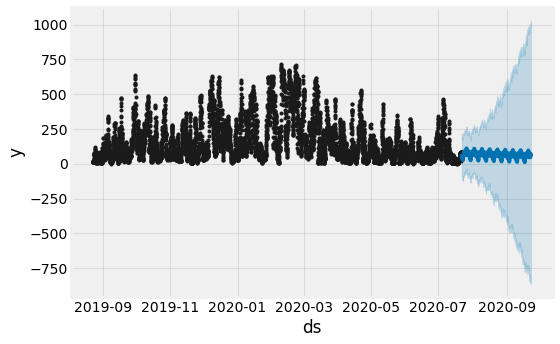

In [45]:
# plot historical values and forecast values

fig = model_prophet.plot(test_prophet, figsize=(8,5))

Initial model is pretty terrible, so let's go back and figure out what parameters we can change

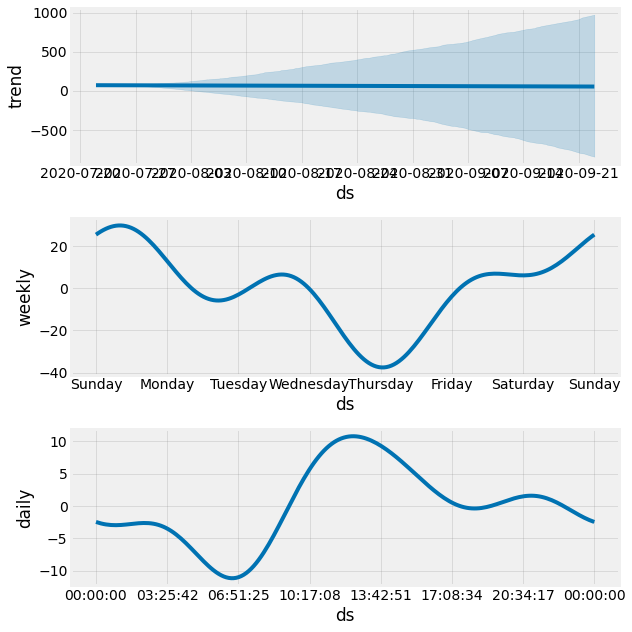

In [46]:
fig = model_prophet.plot_components(test_prophet)

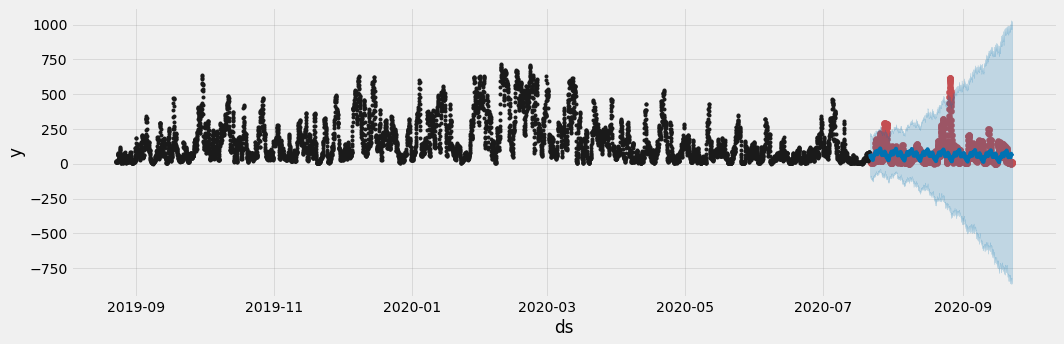

In [47]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test["Dates"], test["TWH_Generation"], color='r')
fig = model_prophet.plot(test_prophet, ax=ax)

In [48]:
eval_accuracy(test["TWH_Generation"],test_prophet['yhat'])

{'MAE': 53.049, 'RMSE': 84.512, 'MAPE': 223.666}

Using default parameters for prophet model, we get: {'MAE': 52.079, 'RMSE': 86.857, 'MAPE': 179.253}

adding yearly_seasonality=20 to model gives {'MAE': 109.27, 'RMSE': 135.33, 'MAPE': 568.851}

reducing yearly_seasonality to 4 in the model gives {'MAE': 211.261, 'RMSE': 238.702, 'MAPE': 1226.523}

changing the model to use logistic growth with cap of 1000 and floor of 0 gives {'MAE': 56.184, 'RMSE': 96.313, 'MAPE': 110.319}

regular model with seasonality_prior_scale set to 1 gives {'MAE': 52.17, 'RMSE': 86.31, 'MAPE': 187.787}

regular model with changepoint_prior_scale set to 0.5 gives {'MAE': 53.286, 'RMSE': 84.874, 'MAPE': 223.09}

regular model with changepoint_prior_scale=0.5, seasonality_prior_scale=1 gives{'MAE': 53.269, 'RMSE': 84.898, 'MAPE': 222.523}

regular model with changepoint_prior_scale=0.5, seasonality_prior_scale=7 gives {'MAE': 53.372, 'RMSE': 84.818, 'MAPE': 225.125}

regular model with 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01 gives {'MAE': 53.049, 'RMSE': 84.512, 'MAPE': 223.666}


In [49]:
# plot actual vs forecast in an interactive plot

test = pd.merge(left=test, right=test_prophet.rename(columns={'ds':"Dates",'yhat':'prediction_prophet'}), 
               on = "Dates",
               how="left")

In [50]:
# plot

fig = px.scatter(test, x="Dates", y=["TWH_Generation", "prediction_prophet"],
                hover_data=["day_of_week"])
fig.update_traces(mode='markers+lines', marker_size=3)
fig.show()

### Hyperparameter tuning using cross-validation

In [51]:
#Cross-validation 
import itertools
import time
import logging
logging.getLogger().setLevel(logging.ERROR)
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

def run_prophet_cv(timeserie):
  start_time = time.time()
  cv_start_time = datetime.datetime.now() - datetime.timedelta(hours=7)
#   series_name = timeserie.name
#   timeserie = timeserie.reset_index()
#   timeserie.columns = ['ds','y']
  param_grid = {  
                'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
                'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0], 
                }
  cutoffs = pd.to_datetime(['2020-04-22'])
  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  mapes = []  # Store the MAPEs for each params here

  # Use cross validation to evaluate all parameters
  # other performance metrics available like mse, rmse, mae, mape, mdape,smape,coverage
  for params in all_params:
      m = Prophet(**params).fit(timeserie)  # Fit model with given params
      df_cv = cross_validation(m, cutoffs=cutoffs, horizon='90 days', parallel='threads')
      df_p = performance_metrics(df_cv, rolling_window=1)
      mapes.append(df_p['mape'].values[0])

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['mape'] = mapes
  # print('tuning results:\n',tuning_results)

  best_params = all_params[np.argmin(mapes)]
  print('best param:',best_params)
  print("---CV took %s seconds ----" % (time.time() - start_time))
  print("--- CV started at ----", cv_start_time)
  return best_params

In [52]:
f = run_prophet_cv(train.rename(columns={'Dates':'ds', 'TWH_Generation':'y'}))
f

best param: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}
---CV took 200.51646780967712 seconds ----
--- CV started at ---- 2021-02-28 21:56:14.506089


{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}

best param: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}
---CV took 203.51009392738342 seconds ----

Some more tuning is needed for this model to get better accuracy. 

Insights and ideas are welcome!

---More to follow ---